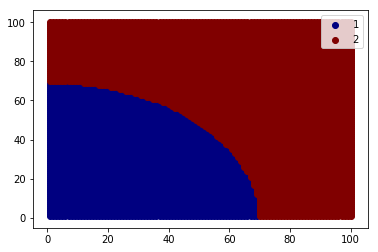

In [67]:
import numpy as np
import sys
import math
import copy
from time import time
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_excel("D:/Dataset/X_data.xlsx", header=None)
df.head()

u=df[2].unique().tolist()
m=len(df)
# print(m)
# n_m=0
pr_mat=[]
mean_mat=[]
for i in u:
    c= df[df[2]==i]
    n=(len(c))
    pr=n/m
    pr_mat.append(pr)
    k= c[0].mean()
    mean_mat.append(k)
    l=c[1].mean()
    mean_mat.append(l)
    if i==1:
        c1_m=np.cov(c[0],c[1])
    else:
        c2_m=np.cov(c[0],c[1])
#     n_m = n_m + (c_m*n)
# print(c2_m)
mean_mat=np.reshape(mean_mat,(2,2))
# print(mean_mat)
# print(pr_mat)
# print(pr_mat[0])
# sigma=np.linalg.inv(n_m/m)
# numpy.linalg.inv(x)
# print(n_m/m)
# print(c1_m)
# print(c2_m)
    
# df1 = df.drop(2, axis=1)
# # df1.head
target=[]    
for row in df.itertuples():
    x=[]
#     print(row[1])
    x.append(row[1])
    x.append(row[2])
    x=np.reshape(x,(1,2))
    li=[]
    for b in mean_mat:
#         print(b[0])
        z=[]
        z.append(b[0])
        z.append(b[1])
        z=np.reshape(z,(1,2))
        
        T=np.transpose(z)
#         print(T.shape)
#         print(z.shape)
#         print(x.shape)
#         print(sigma.shape)
#         print(T.dot(sigma).dot(z))
#         print(T.dot(sigma).dot(x))
        if row[3]==1:
            p=pr_mat[0]
            d = np.linalg.det(c1_m)
            sigma=np.linalg.inv(c1_m)
        else:
            p=pr_mat[1]
            d = np.linalg.det(c2_m)
#             print(d)
            sigma=np.linalg.inv(c2_m)
#         print(d)
#         L= -(.5*T.dot(sigma).dot(z))+ T.dot(sigma).dot(x)+ math.log(.33333333333333)
#         L=.5*math.log(d)-(.5*(x-T)).dot(sigma).dot(np.reshape((x-T),(2,1)))+math.log(p)
#         print(math.log(d))
#         print((x-T))
        
#         print(sigma)
#         print(np.reshape((x-T),(2,1)))
#         print(math.log(p))
        s1=np.matmul((x-z),(sigma))
        s2=np.matmul(s1,np.reshape((x-z),(2,1)))
#         L=.5*math.log(d)-(.5*np.matmul(np.matmul((x-T),(sigma)),(np.reshape((x-T),(2,1)))))+math.log(p)
        L= .5*math.log(d)-(.5*s2)+math.log(p)
        
#         print(L)
        li.append(L)
#     print(li)
    predicted=1+li.index(max(li))
    
    target.append(predicted)
# print(target)
df1 = df.drop(2, axis=1)  
df1[2] = target
# np.savetxt("file_name.csv", target, delimiter=",", fmt='%s')
df1.head
# df1.to_csv(df1, sep='\t')
# df1.to_csv(df1, encoding='utf-8', index=False)
# d=sum(((df[2]-df1[2])**2))
# print(d)

x=df1[0].values
y=df1[1].values
classes=df[2].values
unique = np.unique(classes)
colors = [plt.cm.jet(i/float(len(unique)-1)) for i in range(len(unique))]
for i, u in enumerate(unique):
    xi = [x[j] for j  in range(len(x)) if classes[j] == u]
    yi = [y[j] for j  in range(len(x)) if classes[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()

plt.show()